In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import json
import copy

In [62]:
f = open('champion.json',encoding="utf8")
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [63]:
info_champs = data['data']

In [64]:
all_champions = list(data['data'].keys())
all_champions[0]

'Aatrox'

In [65]:
all_stats = list(info_champs[all_champions[52]]['stats'])
all_stats.remove("crit")
all_stats.remove("critperlevel")
relevant_stats = all_stats
print(relevant_stats)

['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed']


In [66]:
all_tags = []
for champ in all_champions:
    for tag in info_champs[champ]['tags']:
        all_tags.append(tag)
all_tags = list(set(all_tags))
print(all_tags)

['Support', 'Mage', 'Tank', 'Fighter', 'Assassin', 'Marksman']


In [67]:
info_champs[all_champions[52]]

{'version': '13.11.1',
 'id': 'Kalista',
 'key': '429',
 'name': 'Kalista',
 'title': 'the Spear of Vengeance',
 'blurb': 'A specter of wrath and retribution, Kalista is the undying spirit of vengeance, an armored nightmare summoned from the Shadow Isles to hunt deceivers and traitors. The betrayed may cry out in blood to be avenged, but Kalista only answers those willing...',
 'info': {'attack': 8, 'defense': 2, 'magic': 4, 'difficulty': 7},
 'image': {'full': 'Kalista.png',
  'sprite': 'champion1.png',
  'group': 'champion',
  'x': 96,
  'y': 96,
  'w': 48,
  'h': 48},
 'tags': ['Marksman'],
 'partype': 'Mana',
 'stats': {'hp': 600,
  'hpperlevel': 114,
  'mp': 300,
  'mpperlevel': 45,
  'movespeed': 330,
  'armor': 24,
  'armorperlevel': 5.2,
  'spellblock': 30,
  'spellblockperlevel': 1.3,
  'attackrange': 525,
  'hpregen': 4,
  'hpregenperlevel': 0.75,
  'mpregen': 6.3,
  'mpregenperlevel': 0.4,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 61,
  'attackdamageperlevel': 3.25

In [68]:
for i in all_champions:
    if info_champs[i]['info']['attack']==0 and info_champs[i]['info']['defense']==0 and info_champs[i]['info']['magic']==0 and info_champs[i]['info']['difficulty']==0 :
        print(i)
    #print(i,info_champs[i]['info'])

Akshan
Rell
Seraphine
Vex


In [69]:
def make_vecteur_stats(dic_champ):
    stats = dic_champ['stats']
    return([stats[k] for k in relevant_stats])

In [70]:
Vector_space = {}
for champ in all_champions:
    Vector_space[champ] = make_vecteur_stats(info_champs[champ])

In [71]:
Vector_space

{'Aatrox': [650,
  114,
  0,
  0,
  345,
  38,
  4.45,
  32,
  2.05,
  175,
  3,
  1,
  0,
  0,
  60,
  5,
  2.5,
  0.651],
 'Ahri': [590,
  96,
  418,
  25,
  330,
  21,
  4.7,
  30,
  1.3,
  550,
  2.5,
  0.6,
  8,
  0.8,
  53,
  3,
  2,
  0.668],
 'Akali': [570,
  119,
  200,
  0,
  345,
  23,
  4.7,
  37,
  2.05,
  125,
  9,
  0.9,
  50,
  0,
  62,
  3.3,
  3.2,
  0.625],
 'Akshan': [630,
  104,
  350,
  40,
  330,
  26,
  4.2,
  30,
  1.3,
  500,
  3.75,
  0.65,
  8.2,
  0.7,
  52,
  3.5,
  4,
  0.638],
 'Alistar': [685,
  120,
  350,
  40,
  330,
  47,
  4.7,
  32,
  2.05,
  125,
  8.5,
  0.85,
  8.5,
  0.8,
  62,
  3.75,
  2.125,
  0.625],
 'Amumu': [685,
  94,
  285,
  40,
  335,
  30,
  4,
  32,
  2.05,
  125,
  9,
  0.85,
  7.4,
  0.55,
  53,
  3.8,
  2.18,
  0.736],
 'Anivia': [550,
  92,
  495,
  45,
  325,
  21,
  4.9,
  30,
  1.3,
  600,
  5.5,
  0.55,
  8,
  0.8,
  51,
  3.2,
  1.68,
  0.625],
 'Annie': [560,
  102,
  418,
  25,
  335,
  19,
  4.7,
  30,
  1.3,
  625,
  

In [72]:
def minmax_normalize(vector_space_n):
    vector_space = copy.deepcopy(vector_space_n)
    minmaxs = [[1000,0] for i in relevant_stats]
    for champ in all_champions:
        vec = vector_space[champ]
        for i in range(len(vec)):
            if minmaxs[i][0]>vec[i]:
                minmaxs[i][0] = vec[i]
            if minmaxs[i][1]<vec[i]:
                minmaxs[i][1] = vec[i]
    for champ in all_champions:
        vec = vector_space[champ]
        for i in range(len(vec)):
            vec[i] = (vec[i] - minmaxs[i][0])/(minmaxs[i][1] - minmaxs[i][0])
    return vector_space

In [73]:
Norm_Vector_space = minmax_normalize(Vector_space)

In [74]:
Norm_Vector_space

{'Aatrox': [0.8391608391608392,
  0.75,
  0.0,
  0.0,
  0.6666666666666666,
  0.6896551724137931,
  0.8090909090909091,
  0.5882352941176471,
  0.6774193548387096,
  0.09523809523809523,
  0.06666666666666667,
  0.7058823529411765,
  0.0,
  0.0,
  0.625,
  1.0,
  0.4166666666666667,
  0.46933333333333344],
 'Ahri': [0.6293706293706294,
  0.45,
  0.0418,
  0.28735632183908044,
  0.16666666666666666,
  0.10344827586206896,
  0.8545454545454546,
  0.47058823529411764,
  0.19354838709677424,
  0.8095238095238095,
  0.0,
  0.23529411764705876,
  0.16,
  0.8,
  0.40625,
  0.6,
  0.3333333333333333,
  0.5146666666666668],
 'Akali': [0.5594405594405595,
  0.8333333333333334,
  0.02,
  0.0,
  0.6666666666666666,
  0.1724137931034483,
  0.8545454545454546,
  0.8823529411764706,
  0.6774193548387096,
  0.0,
  0.8666666666666667,
  0.5882352941176471,
  1.0,
  0.0,
  0.6875,
  0.6599999999999999,
  0.5333333333333333,
  0.4000000000000001],
 'Akshan': [0.7692307692307693,
  0.5833333333333334,
  0

In [75]:
tag_space = {}
for champ in all_champions:
    tag_space[champ] = info_champs[champ]['tags']

In [76]:
tag_space

{'Aatrox': ['Fighter', 'Tank'],
 'Ahri': ['Mage', 'Assassin'],
 'Akali': ['Assassin'],
 'Akshan': ['Marksman', 'Assassin'],
 'Alistar': ['Tank', 'Support'],
 'Amumu': ['Tank', 'Mage'],
 'Anivia': ['Mage', 'Support'],
 'Annie': ['Mage'],
 'Aphelios': ['Marksman'],
 'Ashe': ['Marksman', 'Support'],
 'AurelionSol': ['Mage'],
 'Azir': ['Mage', 'Marksman'],
 'Bard': ['Support', 'Mage'],
 'Belveth': ['Fighter'],
 'Blitzcrank': ['Tank', 'Fighter'],
 'Brand': ['Mage'],
 'Braum': ['Support', 'Tank'],
 'Caitlyn': ['Marksman'],
 'Camille': ['Fighter', 'Tank'],
 'Cassiopeia': ['Mage'],
 'Chogath': ['Tank', 'Mage'],
 'Corki': ['Marksman'],
 'Darius': ['Fighter', 'Tank'],
 'Diana': ['Fighter', 'Mage'],
 'Draven': ['Marksman'],
 'DrMundo': ['Fighter', 'Tank'],
 'Ekko': ['Assassin', 'Fighter'],
 'Elise': ['Mage', 'Fighter'],
 'Evelynn': ['Assassin', 'Mage'],
 'Ezreal': ['Marksman', 'Mage'],
 'Fiddlesticks': ['Mage', 'Support'],
 'Fiora': ['Fighter', 'Assassin'],
 'Fizz': ['Assassin', 'Fighter'],
 'Gal

In [77]:
Vector_tags = {}
for champ in all_champions:
    vec_tag = [0 for k in range(len(all_tags))]
    tag = tag_space[champ]
    vec_tag[all_tags.index(tag[0])] = 10
    try:
        vec_tag[all_tags.index(tag[1])] = 5
        Vector_tags[champ] = vec_tag
    except:
        Vector_tags[champ] = vec_tag
print(Vector_tags)

{'Aatrox': [0, 0, 5, 10, 0, 0], 'Ahri': [0, 10, 0, 0, 5, 0], 'Akali': [0, 0, 0, 0, 10, 0], 'Akshan': [0, 0, 0, 0, 5, 10], 'Alistar': [5, 0, 10, 0, 0, 0], 'Amumu': [0, 5, 10, 0, 0, 0], 'Anivia': [5, 10, 0, 0, 0, 0], 'Annie': [0, 10, 0, 0, 0, 0], 'Aphelios': [0, 0, 0, 0, 0, 10], 'Ashe': [5, 0, 0, 0, 0, 10], 'AurelionSol': [0, 10, 0, 0, 0, 0], 'Azir': [0, 10, 0, 0, 0, 5], 'Bard': [10, 5, 0, 0, 0, 0], 'Belveth': [0, 0, 0, 10, 0, 0], 'Blitzcrank': [0, 0, 10, 5, 0, 0], 'Brand': [0, 10, 0, 0, 0, 0], 'Braum': [10, 0, 5, 0, 0, 0], 'Caitlyn': [0, 0, 0, 0, 0, 10], 'Camille': [0, 0, 5, 10, 0, 0], 'Cassiopeia': [0, 10, 0, 0, 0, 0], 'Chogath': [0, 5, 10, 0, 0, 0], 'Corki': [0, 0, 0, 0, 0, 10], 'Darius': [0, 0, 5, 10, 0, 0], 'Diana': [0, 5, 0, 10, 0, 0], 'Draven': [0, 0, 0, 0, 0, 10], 'DrMundo': [0, 0, 5, 10, 0, 0], 'Ekko': [0, 0, 0, 5, 10, 0], 'Elise': [0, 10, 0, 5, 0, 0], 'Evelynn': [0, 5, 0, 0, 10, 0], 'Ezreal': [0, 5, 0, 0, 0, 10], 'Fiddlesticks': [5, 10, 0, 0, 0, 0], 'Fiora': [0, 0, 0, 10, 5, 0]

In [78]:
for champ in all_champions:
    Norm_Vector_space[champ] = Norm_Vector_space[champ] + Vector_tags[champ]
print(Norm_Vector_space)

{'Aatrox': [0.8391608391608392, 0.75, 0.0, 0.0, 0.6666666666666666, 0.6896551724137931, 0.8090909090909091, 0.5882352941176471, 0.6774193548387096, 0.09523809523809523, 0.06666666666666667, 0.7058823529411765, 0.0, 0.0, 0.625, 1.0, 0.4166666666666667, 0.46933333333333344, 0, 0, 5, 10, 0, 0], 'Ahri': [0.6293706293706294, 0.45, 0.0418, 0.28735632183908044, 0.16666666666666666, 0.10344827586206896, 0.8545454545454546, 0.47058823529411764, 0.19354838709677424, 0.8095238095238095, 0.0, 0.23529411764705876, 0.16, 0.8, 0.40625, 0.6, 0.3333333333333333, 0.5146666666666668, 0, 10, 0, 0, 5, 0], 'Akali': [0.5594405594405595, 0.8333333333333334, 0.02, 0.0, 0.6666666666666666, 0.1724137931034483, 0.8545454545454546, 0.8823529411764706, 0.6774193548387096, 0.0, 0.8666666666666667, 0.5882352941176471, 1.0, 0.0, 0.6875, 0.6599999999999999, 0.5333333333333333, 0.4000000000000001, 0, 0, 0, 0, 10, 0], 'Akshan': [0.7692307692307693, 0.5833333333333334, 0.035, 0.45977011494252873, 0.16666666666666666, 0.27

In [80]:
role = ['top','mid','jgl','adc','sup','none']
build = ['onhit','crit','lethalite','adbruiser','tank','tanksup','apsup','apbruiser','apdps','apburst','none']

In [82]:
f = open('handmade_stats.json',encoding="utf8")
  
# returns JSON object as 
# a dictionary
handmade_stats = json.load(f)

In [83]:
handmade_stats

{'Aatrox': ['top', 'mid', 'adbruiser', 'lethalite'],
 'Ahri': ['mid', 'sup', 'apburst', 'apdps'],
 'Akali': ['mid', 'top', 'apburst', 'apdps'],
 'Akshan': ['top', 'mid', 'onhit', 'crit'],
 'Alistar': ['sup', 'jgl', 'tank', 'apburst'],
 'Amumu': ['sup', 'jgl', 'tank', 'apburst'],
 'Anivia': ['mid', 'sup', 'apburst', 'apdps'],
 'Annie': ['mid', 'sup', 'apburst', 'apdps'],
 'Aphelios': ['adc', 'none', 'crit', 'onhit'],
 'Ashe': ['sup', 'adc', 'apsup', 'onhit'],
 'AurelionSol': ['mid', 'top', 'apdps', 'apburst'],
 'Azir': ['mid', 'top', 'apdps', 'apburst'],
 'Bard': ['sup', 'none', 'apsup', 'tanksup'],
 'Belveth': ['jgl', 'none', 'onhit', 'tank'],
 'Blitzcrank': ['sup', 'jgl', 'tank', 'onhit'],
 'Brand': ['sup', 'mid', 'apdps', 'apburst'],
 'Braum': ['sup', 'none', 'tanksup', 'tank'],
 'Caitlyn': ['adc', 'none', 'crit', 'lethalite'],
 'Camille': ['top', 'none', 'adbruiser', 'tank'],
 'Cassiopeia': ['mid', 'top', 'apdps', 'tank'],
 'Chogath': ['top', 'jgl', 'tank', 'apburst'],
 'Corki': ['m

In [89]:
for champ in all_champions:
    vec_hand = [0 for k in range(15)]
    i = handmade_stats[champ]
    try:
        vec_hand[role.index(i[0])] = 10
        vec_hand[build.index(i[2])+5] = 10
        if i[1]!="none":
            vec_hand[role.index(i[1])] = 5
        if i[3]!="none":
            vec_hand[build.index(i[3])+5] = 5
    except Exception as e:
        print(champ)
        print(info)
        print(e)
    if len(Norm_Vector_space[champ]) <39: 
        Norm_Vector_space[champ] = Norm_Vector_space[champ] + vec_hand
print(Norm_Vector_space['Pyke'])

[0.9090909090909091, 0.5833333333333334, 0.0415, 0.5747126436781609, 0.16666666666666666, 0.9310344827586207, 0.8545454545454546, 0.5882352941176471, 0.6774193548387096, 0.047619047619047616, 0.6, 0.11764705882352938, 0.16, 1.0, 0.6875, 0.4, 0.4166666666666667, 0.5120000000000001, 10, 0, 0, 0, 5, 0, 0, 0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0]


In [88]:
len(Norm_Vector_space['Pyke'])

39

In [104]:
sorts = ['boost','heal','peel','cc','engage','dash','degats']
handmade_sorts = {}
for champ in all_champions:
    print(champ)
    boost = input('boost')
    heal = input('heal')
    peel = input('peel')
    cc = input('cc')
    engage = input('engage')
    dash = input('dash')
    inv = input('invisibilité')
    degats = input('degats')
    glob = input('global')
    handmade_sorts[champ] = [boost,heal,peel,cc,engage,dash,inv,degats,glob]

Aatrox
boost1
heal2
peel0
cc2
engage0.5
dash1
invisibilité0
degats3
global0
Ahri
boost0.5
heal1
peel0.5
cc1
engage2
dash3
invisibilité0
degats3
global0
Akali
boost0.5
heal0
peel0
cc0
engage2
dash4
invisibilité1
degats3
global0
Akshan
boost0
heal0
peel0
cc0
engage1
dash1
invisibilité1
degats3
global0.8
Alistar
boost1
heal1
peel3
cc3
engage3
dash1
invisibilité0
degats0
global0
Amumu
boost0.5
heal0
peel0.5
cc3
engage2
dash0
invisibilité0
degats2
global0
Anivia
boost0
heal0
peel2
cc3
engage0.8
dash0
invisibilité0
degats3
global0
Annie
boost1
heal0
peel1
cc3
engage1
dash0
invisibilité0
degats3
global0
Aphelios
boost1
heal0
peel0
cc1
engage1
dash0
invisibilité0
degats2
global0
Ashe
boost0
heal0
peel1
cc2
engage1
dash0
invisibilité0
degats1.5
global1
AurelionSol
boost0
heal0
peel1
cc2
engage1
dash1
invisibilité0
degats2
global1
Azir
boost0
heal0
peel1
cc1
engage1
dash1
invisibilité0
degats3
global0
Bard
boost1
heal1
peel1
cc1
engage0.5
dash1
invisibilité0
degats2
global0.7
Belveth
boost1
heal

cc0
engage1
dash2
invisibilité0
degats3
global0
Sejuani
boost1
heal0
peel2
cc3
engage2
dash1
invisibilité0
degats1
global0
Senna
boost1
heal2
peel2
cc1
engage0.8
dash0
invisibilité1
degats3
global1
Seraphine
boost1
heal1
peel2
cc2
engage1
dash0
invisibilité0
degats2
global0.5
Sett
boost1
heal1
peel1
cc1
engage2
dash0
invisibilité0
degats3
global0
Shaco
boost0
heal0
peel1
cc2
engage0
dash1
invisibilité1
degats3
global0
Shen
boost0
heal1
peel3
cc1
engage1
dash1
invisibilité0
degats1
global1
Shyvana
boost1
heal0
peel0
cc1
engage1
dash1
invisibilité0
degats3
global0
Singed
boost1
heal0
peel2
cc1
engage1
dash0
invisibilité0
degats2
global0
Sion
boost0
heal1
peel2
cc2
engage1
dash0
invisibilité0
degats2
global1
Sivir
boost0
heal1
peel0
cc0
engage1
dash0
invisibilité0
degats4
global0
Skarner
boost1
heal0
peel2
cc2
engage1
dash0
invisibilité0
degats2
global0
Sona
boost2
heal1
peel2
cc1
engage0.8
dash0
invisibilité0
degats1
global0
Soraka
boost1
heal3
peel2
cc1
engage0
dash0
invisibilité0
degat

In [115]:
for champ in all_champions:
    Norm_Vector_space[champ] = Norm_Vector_space[champ] + handmade_sorts[champ]

In [135]:
for champ in all_champions:
    for k in range(48):
        try:
            Norm_Vector_space[champ][k] = float(Norm_Vector_space[champ][k])
        except:
            print(champ)

In [ ]:
[boost,heal,peel,cc,engage,dash,inv,degats,glob]

In [117]:
len(Norm_Vector_space['Aatrox'])

48

In [136]:
def distance(vec1,vec2):
    d = 0
    for i in range(len(vec1)):
        d+=(vec1[i]-vec2[i])**2
    return d

In [137]:
mini,maxi = 1000,0
mini_c1,mini_c2 = 0,0
maxi_c1,maxi_c2 = 0,0
for champ1 in all_champions:
    for champ2 in all_champions:
        if champ1!=champ2:
            d = distance(Norm_Vector_space[champ1],Norm_Vector_space[champ2])
            if d<mini:
                mini=d
                mini_c1 = champ1
                mini_c2 = champ2
            if d>maxi:
                maxi=d
                maxi_c1 = champ1
                maxi_c2 = champ2

print(mini_c1,mini_c2,mini)
print(maxi_c1,maxi_c2,maxi)

Velkoz Xerath 1.505819704014804
Alistar Ezreal 794.8791029881779


In [142]:
all_distances = []
for champ1 in all_champions:
    for champ2 in all_champions:
        if champ1!=champ2:
            d = distance(Norm_Vector_space[champ1],Norm_Vector_space[champ2])
            all_distances.append([champ1,champ2,d])
all_distances.sort(key = lambda x : x[-1])
all_distances = [all_distances[2*k] for k in range(len(all_distances)//2)]

In [143]:
print(all_distances)

[['Velkoz', 'Xerath', 1.505819704014804], ['Lulu', 'Renata', 1.5788006910999917], ['Darius', 'Illaoi', 1.9101732885507496], ['Sona', 'Yuumi', 2.049174980953243], ['Syndra', 'Viktor', 2.119715257683931], ['Janna', 'Sona', 2.666147716192929], ['Aphelios', 'Jinx', 2.72039673488161], ['Janna', 'Nami', 2.9447946737755775], ['Janna', 'Yuumi', 2.9790243169715405], ['Fiddlesticks', 'Neeko', 3.0310706946761083], ['Nami', 'Sona', 3.456103477640651], ['Soraka', 'Yuumi', 3.658360027728566], ['Caitlyn', 'Xayah', 4.210684943356905], ['Rammus', 'Sejuani', 4.7741802391974], ['Camille', 'Darius', 5.029966680620483], ['Draven', 'Samira', 5.09146395408437], ['Morgana', 'Zyra', 5.395679052021924], ['Nami', 'Yuumi', 5.718399470258623], ['Camille', 'Gnar', 5.722483658760453], ['Janna', 'Soraka', 5.811583025112146], ['Camille', 'Kled', 6.818469049865742], ['Sona', 'Soraka', 6.914535644992153], ['Darius', 'Garen', 6.983001539730877], ['Garen', 'Illaoi', 7.0223168511012215], ['Syndra', 'Vex', 7.108532499936602

(array([ 323.,  396.,  675.,  829.,  756., 1072., 1662., 1990., 3949.,
        1551.]),
 array([  1.5058197 ,  80.84314803, 160.18047636, 239.51780469,
        318.85513302, 398.19246135, 477.52978967, 556.867118  ,
        636.20444633, 715.54177466, 794.87910299]),
 <BarContainer object of 10 artists>)

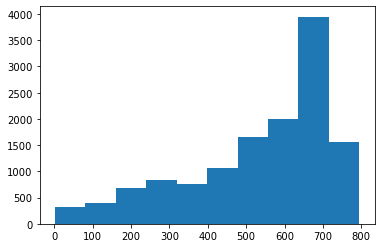

In [144]:
dists = [a[-1] for a in all_distances]
plt.hist(dists)

In [215]:
for champ in all_champions:
    Norm_Vector_space[champ][-1] = float(Norm_Vector_space[champ][-1]) 

In [214]:
type(Norm_Vector_space)

dict

In [185]:
def give_closest(champ):
    res = []
    for k in range(len(all_distances)):
        if all_distances[k][0] == champ or all_distances[k][1]==champ:
            res.append(all_distances[k])
    res = sorted(res,key=lambda x : x[2])[:10]
    res = [(r[0],r[1],r[2], preds[all_champions.index(r[0])], preds[all_champions.index(r[1])]) for r in res]
    res.append(preds[all_champions.index(champ)])
    return res

In [186]:
give_closest("Pantheon")

[('Pantheon', 'Yorick', 84.04903639554487, 5, 5),
 ('Pantheon', 'Riven', 94.70194448091132, 5, 5),
 ('Pantheon', 'Renekton', 110.83983061574207, 5, 5),
 ('Jayce', 'Pantheon', 111.28414252754371, 5, 5),
 ('Gangplank', 'Pantheon', 133.40208097594748, 5, 5),
 ('LeeSin', 'Pantheon', 163.22346801669633, 2, 5),
 ('Fiora', 'Pantheon', 163.92011957503013, 5, 5),
 ('Aatrox', 'Pantheon', 166.14415623208254, 5, 5),
 ('Pantheon', 'RekSai', 184.64407938458191, 5, 2),
 ('Irelia', 'Pantheon', 199.9779014067446, 5, 5),
 5]

In [187]:
def give_farthest(champ):
    res = []
    for k in range(len(all_distances)):
        if all_distances[k][0] == champ or all_distances[k][1]==champ:
            res.append(all_distances[k])
    res = sorted(res,reverse = True,key=lambda x : x[2])[:10]
    res = [(r[0],r[1],r[2], preds[all_champions.index(r[0])], preds[all_champions.index(r[1])]) for r in res]
    res.append(preds[all_champions.index(champ)])
    return res

In [188]:
give_farthest("Syndra")

[('Blitzcrank', 'Syndra', 711.4176400978342, 3, 1),
 ('Syndra', 'Warwick', 711.3635086942959, 1, 5),
 ('LeeSin', 'Syndra', 711.1232732029468, 2, 1),
 ('Pantheon', 'Syndra', 709.6576543707687, 5, 1),
 ('Poppy', 'Syndra', 709.6407527959018, 3, 1),
 ('Senna', 'Syndra', 708.7808842934949, 0, 1),
 ('Ashe', 'Syndra', 708.6344796677566, 4, 1),
 ('JarvanIV', 'Syndra', 708.4070070364071, 3, 1),
 ('Nasus', 'Syndra', 708.1323876275878, 5, 1),
 ('Syndra', 'Volibear', 707.4889333118821, 1, 3),
 1]

In [165]:
from sklearn.cluster import KMeans

In [166]:
all_vecs = [Norm_Vector_space[champ] for champ in all_champions]

In [167]:
km = KMeans(n_clusters = 6).fit(all_vecs)

In [172]:
preds = km.labels_

In [190]:
for i in range(len(all_champions)):
    Norm_Vector_space[all_champions[i]].append(preds[i])